In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import numpy as np
np.random.seed(13)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.utils.visualize_util import plot
from keras.preprocessing import sequence

Using Theano backend.


In [2]:
# visualization
def draw_digit(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
    plt.gray()

In [3]:
img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window size of filter

# data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [4]:
nb_epoch = 3
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=256, verbose=2,  validation_split=0.2)

INFO (theano.gof.compilelock): Waiting for existing lock by process '22558' (I am process '26090')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/nzw/.theano/compiledir_Darwin-14.5.0-x86_64-i386-64bit-i386-3.5.1-64/lock_dir


Train on 48000 samples, validate on 12000 samples
Epoch 1/3
29s - loss: 0.3615 - acc: 0.8882 - val_loss: 0.1644 - val_acc: 0.9532
Epoch 2/3
27s - loss: 0.0996 - acc: 0.9689 - val_loss: 0.0804 - val_acc: 0.9769
Epoch 3/3
27s - loss: 0.0637 - acc: 0.9805 - val_loss: 0.0645 - val_acc: 0.9802


In [6]:
model.layers

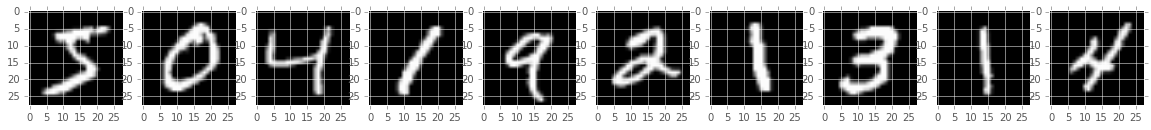

In [7]:
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw_digit(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

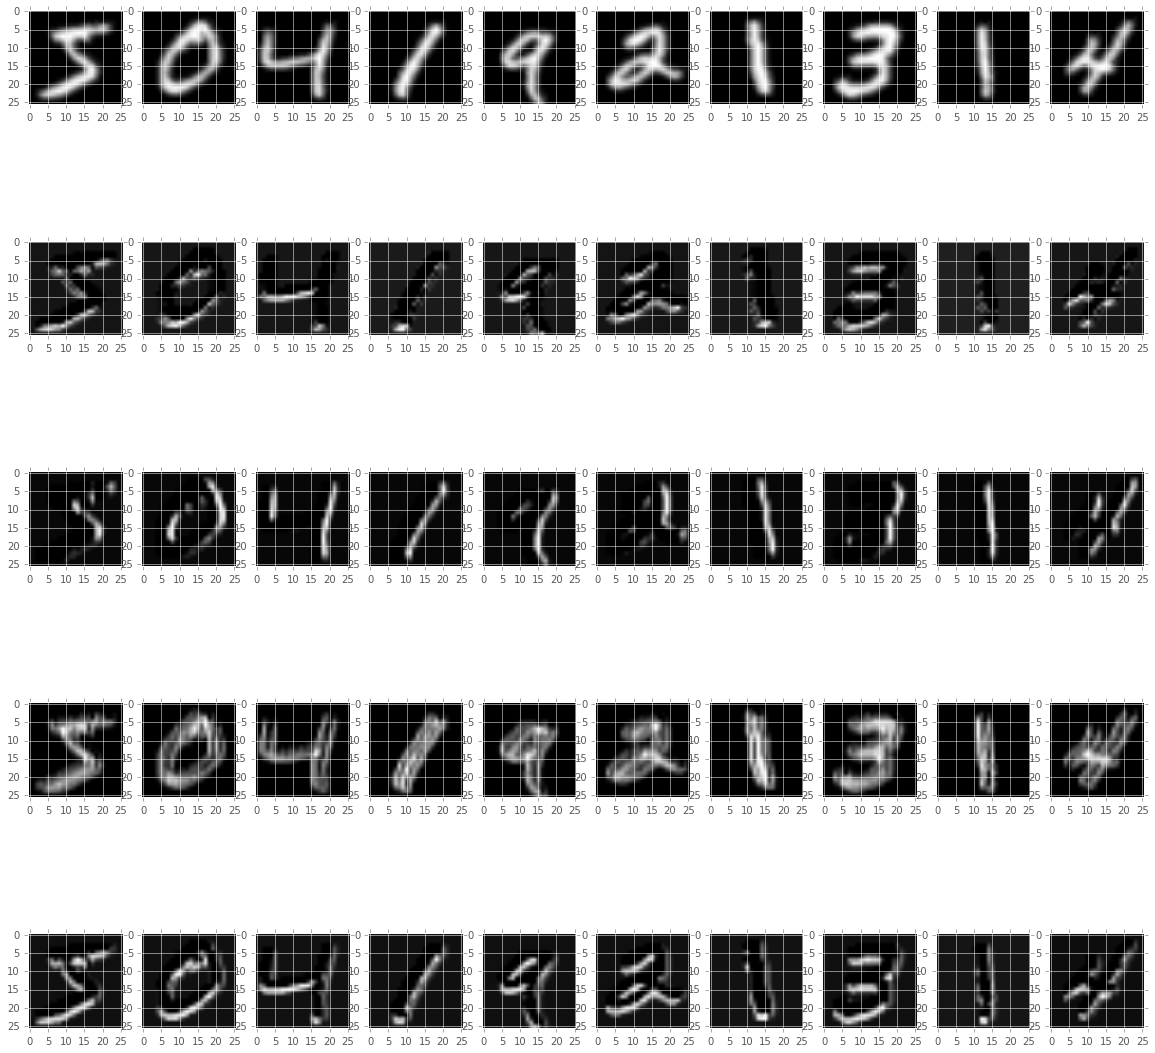

In [8]:
get_first_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

show_size = 10
plt.figure(figsize=(20,20))

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw_digit(mat, nb_filters, show_size, pos)
plt.show()

(10, 5, 24, 24)


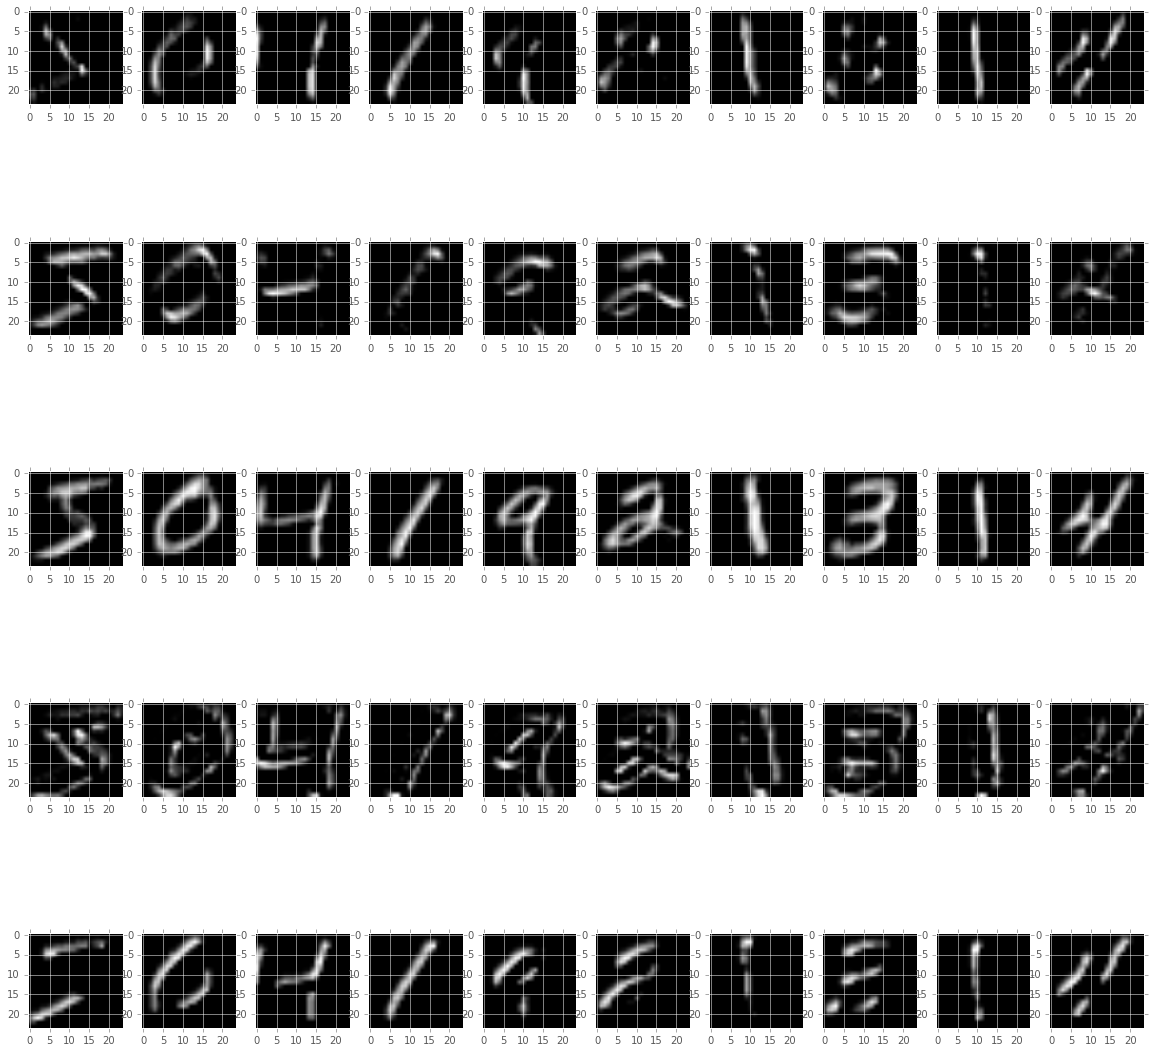

In [9]:
get_second_layer_output = K.function([model.layers[0].input],
                                  [model.layers[3].output])
second_output = get_second_layer_output([X_train[0:show_size]])[0]

show_size = 10
plt.figure(figsize=(20,20))
print(second_output.shape)

for img_index, filters in enumerate(second_output, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw_digit(mat, nb_filters, show_size, pos)
plt.show()

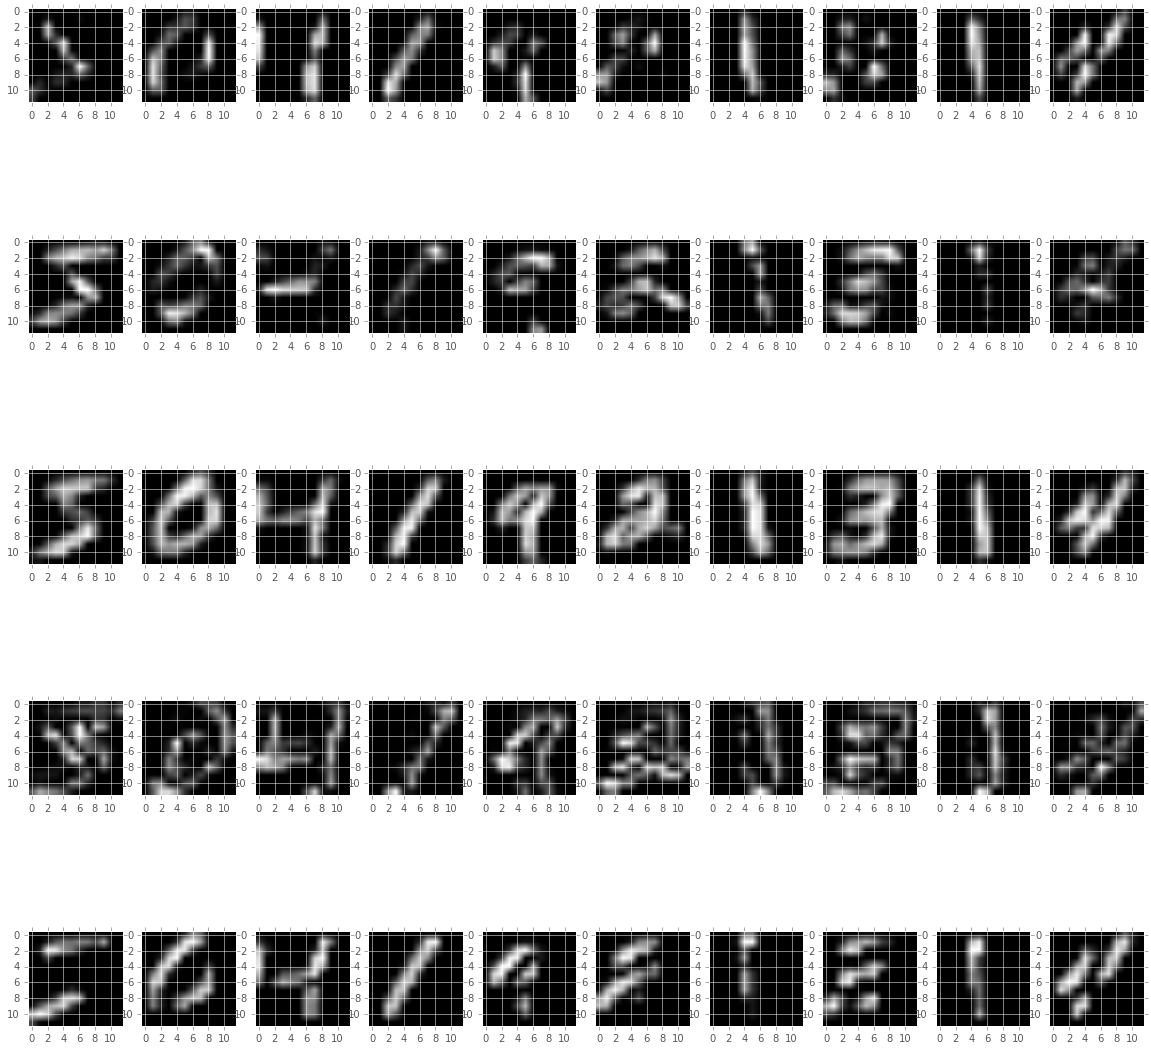

In [10]:
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[4].output])
layers = get_3rd_layer_output([X_train[0:show_size]])[0]

show_size = 10
plt.figure(figsize=(20,20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw_digit(mat, nb_filters, show_size, pos)
plt.show()